# G2M insight for Cab Investment firm

XYZ is a private firm in the US. Due to remarkable growth in the Cab Industry in the last few years and multiple key players in the market, it is planning for an investment in the Cab industry.

Objective: Our main objective is for XYZ to find which is the right company to make their investment.

We have been provided with 4 data sets that contain information about 2 cab companies. Each data set represents different aspects of the customer profile. 

Import libraries which contain functions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading all datasets

In [2]:
d1=pd.read_csv('Cab_Data.csv')
d2=pd.read_csv('City.csv')
d3=pd.read_csv('Customer_ID.csv')
d4=pd.read_csv('Transaction_ID.csv')
print(d1.shape)
print(d2.shape)
print(d3.shape)
print(d4.shape)

(359392, 7)
(20, 3)
(49171, 4)
(440098, 3)


Here, we are merging two datasets (Cab_Data and Transaction_ID) based on their column(Transaction ID).

In [3]:
df_14 = pd.merge(d1, d4)
print(df_14.shape)
df_14.head(5)

(359392, 9)


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card


Now, customer_ID dataset having same column i.e., column ID so we are merging this dataset to above dataset.

In [4]:
df_14 = pd.merge(df_14, d3)
print(df_14.shape)
df_14.head(5)

(359392, 12)


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237


The city dataset and the above dataset having 'city' column. Based on this city column we merged these two datsets. This is the final dataset. The final dataset consists of 359392 rows or observations and 14 columns or features. 

In [5]:
df_14 = pd.merge(df_14, d2)
print(df_14.shape)
df_14.head(5)

(359392, 14)


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701"


## Checking duplicate and null values
In the dataset, first, we must check duplicate and null values. Our dataset has no duplicate values and null values. 

In [6]:
print(df_14.duplicated().sum())
df_14.isnull().sum()

0


Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64

In [7]:
df_14.dtypes

Transaction ID          int64
Date of Travel          int64
Company                object
City                   object
KM Travelled          float64
Price Charged         float64
Cost of Trip          float64
Customer ID             int64
Payment_Mode           object
Gender                 object
Age                     int64
Income (USD/Month)      int64
Population             object
Users                  object
dtype: object

In 'population' and 'Users' columns contain ','. So we removed ',' to convert those columns into int type.

In [8]:
df_14['Population'] = df_14['Population'].replace(',','', regex=True)
df_14['Users'] = df_14['Users'].replace(',','', regex=True)

In the given dataset, the 'Date of Travel' is in different format. Here we are converting this date into ns.

In [9]:
from datetime import datetime, timedelta
def to_date_format(n):
    date_con =(datetime(1899,12,30) + timedelta(n-1)).strftime("%d-%m-%Y")
    date_d =  datetime.strptime(date_con, "%d-%m-%Y")
    return date_d

df_14['Date of Travel']=df_14['Date of Travel'].apply(lambda x:to_date_format(x))

In [10]:
df_14.head(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701
1,10351127,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701
2,10412921,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701
3,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701
4,10320494,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701


Changing the datatype of columns from one form to another. 

In [11]:
df_14['Population']=df_14['Population'].astype(int)
df_14['Users']=df_14['Users'].astype(int)
df_14['Date of Travel']=df_14['Date of Travel'].astype(str)
df_14.dtypes

Transaction ID          int64
Date of Travel         object
Company                object
City                   object
KM Travelled          float64
Price Charged         float64
Cost of Trip          float64
Customer ID             int64
Payment_Mode           object
Gender                 object
Age                     int64
Income (USD/Month)      int64
Population              int32
Users                   int32
dtype: object

## Descriptive statistical analysis 

In [12]:
print(df_14.describe())

       Transaction ID   KM Travelled  Price Charged   Cost of Trip  \
count    3.593920e+05  359392.000000  359392.000000  359392.000000   
mean     1.022076e+07      22.567254     423.443311     286.190113   
std      1.268058e+05      12.233526     274.378911     157.993661   
min      1.000001e+07       1.900000      15.600000      19.000000   
25%      1.011081e+07      12.000000     206.437500     151.200000   
50%      1.022104e+07      22.440000     386.360000     282.480000   
75%      1.033094e+07      32.960000     583.660000     413.683200   
max      1.044011e+07      48.000000    2048.030000     691.200000   

         Customer ID            Age  Income (USD/Month)    Population  \
count  359392.000000  359392.000000       359392.000000  3.593920e+05   
mean    19191.652115      35.336705        15048.822937  3.132198e+06   
std     21012.412463      12.594234         7969.409482  3.315194e+06   
min         1.000000      18.000000         2000.000000  2.489680e+05   
25% 

## Finding outliers 
The interquartile range (IQR) is a statistical measure used to determine the variability in a dataset by subtracting the 25th percentile (Q1) from the 75th percentile (Q3). Outliers are values that fall outside of a certain range, which is typically calculated as Q1–1.5IQR to Q3+1.5IQR. 

In [13]:
Quartile_1 = df_14.quantile(0.25)
Quartile_3 = df_14.quantile(0.75)

Inter_quartile = Quartile_3 - Quartile_1
((df_14 < (Quartile_1 - 1.5 * Inter_quartile)) | (df_14 > (Quartile_3 + 1.5 * Inter_quartile))).any(axis=1)
    
print(Inter_quartile)



C:\Users\thanu\AppData\Local\Temp\ipykernel_3132\3511672388.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((df_14 < (Quartile_1 - 1.5 * Inter_quartile)) | (df_14 > (Quartile_3 + 1.5 * Inter_quartile))).any(axis=1)
C:\Users\thanu\AppData\Local\Temp\ipykernel_3132\3511672388.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((df_14 < (Quartile_1 - 1.5 * Inter_quartile)) | (df_14 > (Quartile_3 + 1.5 * Inter_quartile))).any(axis=1)


Transaction ID        2.201275e+05
KM Travelled          2.096000e+01
Price Charged         3.772225e+02
Cost of Trip          2.624832e+02
Customer ID           3.337300e+04
Age                   1.700000e+01
Income (USD/Month)    1.261100e+04
Population            7.734599e+06
Users                 2.221280e+05
dtype: float64


## Removing outliers

In [14]:
#not_outliers = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
df_14  = df_14 [~((df_14  < (Quartile_1 - 1.5 * Inter_quartile)) | (df_14  > (Quartile_3 + 1.5 * Inter_quartile))).any(axis=1)]

C:\Users\thanu\AppData\Local\Temp\ipykernel_3132\901017622.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_14  = df_14 [~((df_14  < (Quartile_1 - 1.5 * Inter_quartile)) | (df_14  > (Quartile_3 + 1.5 * Inter_quartile))).any(axis=1)]
C:\Users\thanu\AppData\Local\Temp\ipykernel_3132\901017622.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_14  = df_14 [~((df_14  < (Quartile_1 - 1.5 * Inter_quartile)) | (df_14  > (Quartile_3 + 1.5 * Inter_quartile))).any(axis=1)]


In [15]:
df_14.shape

(353434, 14)

In [16]:
df_14['Profit'] = df_14['Price Charged']-df_14['Cost of Trip']
df_14.head(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701,57.3150
1,10351127,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701,281.2772
2,10412921,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701,194.6480
3,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701,23.6660
4,10320494,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701,253.9808


In [17]:
df_14_pink = df_14.loc[df_14['Company']== 'Pink Cab']
df_14_yellow = df_14.loc[df_14['Company'] == 'Yellow Cab']

In [18]:
df_14_pink_profit = df_14_pink['Profit'].sum()
df_14_yellow_profit = df_14_yellow['Profit'].sum()

In [19]:
print(df_14_pink_profit)
print(df_14_yellow_profit)

5291882.364999998
39526350.383200005


In [20]:
df_14_pink_count = df_14_pink['Company'].count()
df_14_yellow_count = df_14_yellow['Company'].count()

In [21]:
print(df_14_pink_count)
print(df_14_yellow_count)

84693
268741


Below, we calculated the profit per ride for their company. Based on below results, we can say yellow cab company is making profit.

In [22]:
pink_profit = df_14_pink_profit/df_14_pink_count
print(pink_profit)
yellow_profit = df_14_yellow_profit/df_14_yellow_count
print(yellow_profit)

62.483113893710204
147.07971758384468


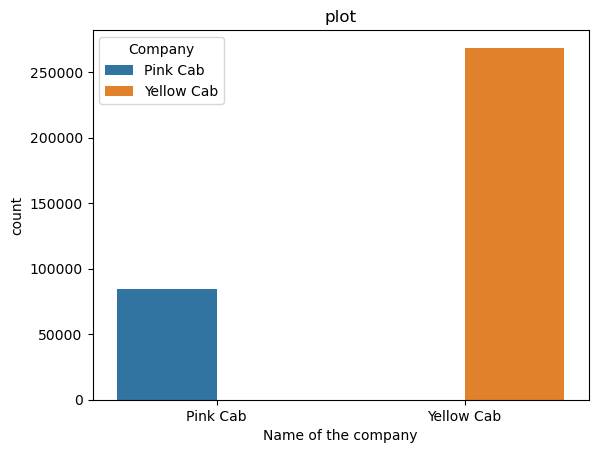

In [23]:
sns.countplot(x='Company',hue='Company',data=df_14)
plt.xlabel('Name of the company')
plt.ylabel('count')
plt.title('plot')
plt.show()

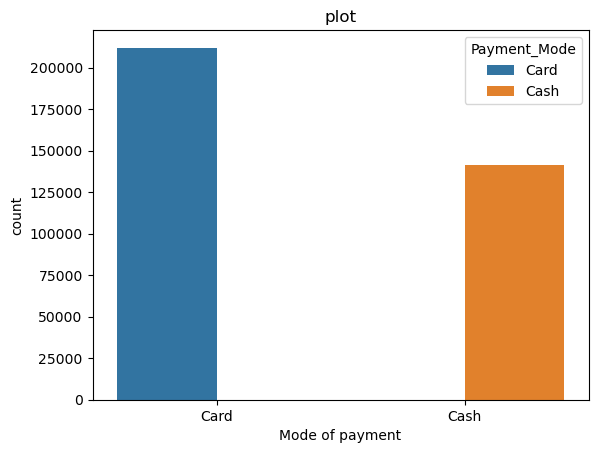

In [24]:
sns.countplot(x='Payment_Mode',hue='Payment_Mode',data=df_14)
plt.xlabel('Mode of payment')
plt.ylabel('count')
plt.title('plot')
plt.show()

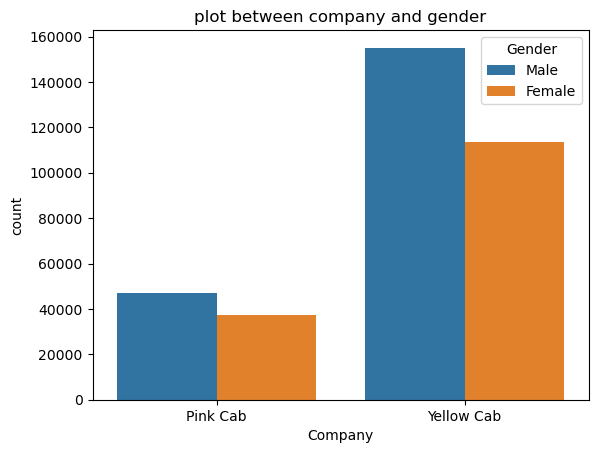

In [25]:
sns.countplot(x ='Company', hue = "Gender", data = df_14)
plt.title('plot between company and gender') 
plt.show()

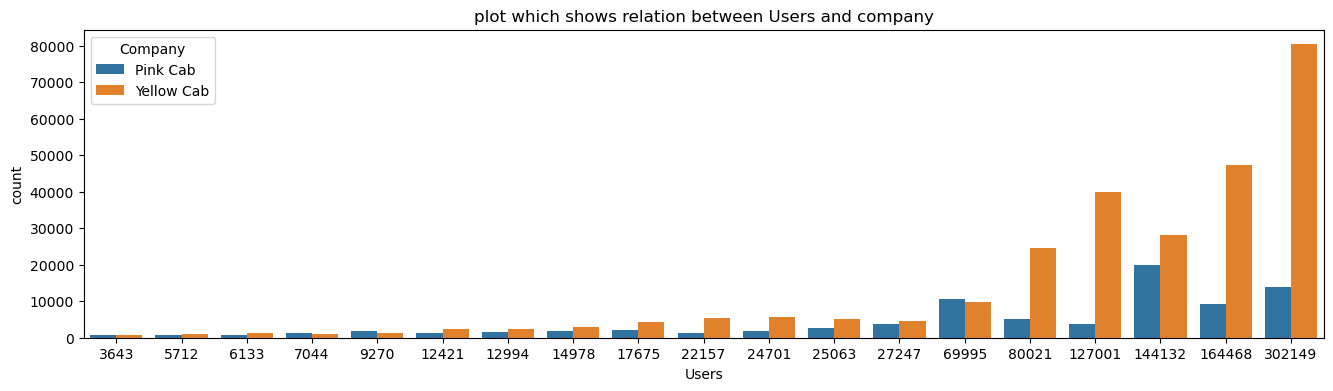

In [26]:
fig, ax = plt.subplots(figsize=(16, 4))
sns.countplot(x ='Users', hue = "Company", data = df_14)
plt.title('plot which shows relation between Users and company') 
plt.show()

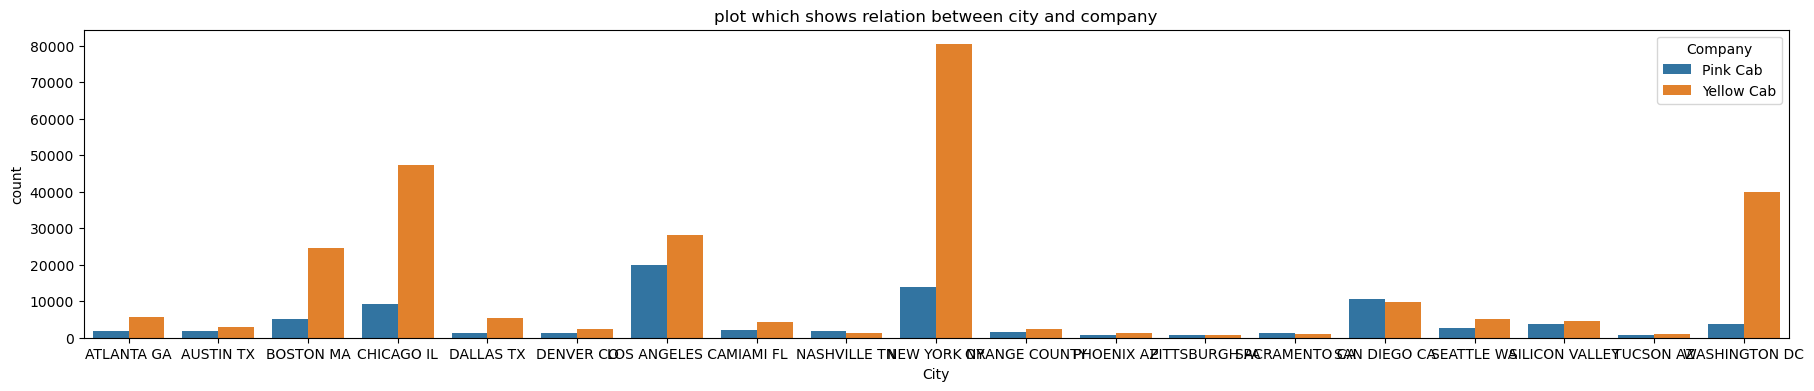

In [27]:
fig, ax = plt.subplots(figsize=(22, 4))
sns.countplot(x ='City', hue = "Company", data = df_14)
plt.title('plot which shows relation between city and company') 
plt.show()